In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [18]:
df=pd.read_csv("/kaggle/input/predicthouseprice/Housing.csv")

In [19]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [20]:
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [21]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [22]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

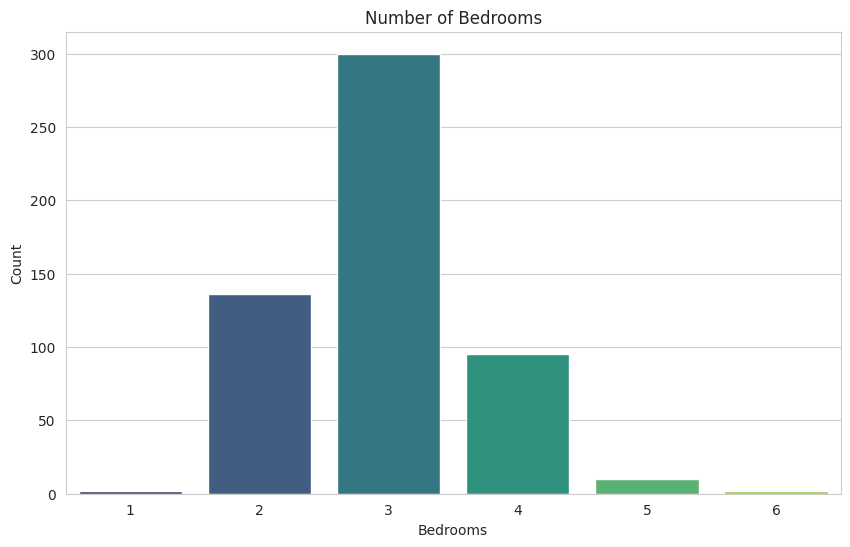

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(x='bedrooms', data=df, palette='viridis')  # Using 'x' argument only
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.show()

In [37]:
df.rename(columns={'bedrooms': 'Bedrooms', 'area': 'SquareFt', 'price': 'Price'}, inplace=True)

In [38]:
features = df[['Bedrooms', 'SquareFt']]
target = df['Price']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [39]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 3280176595474.0137
R-squared: 0.35104738175587247


In [40]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [6.95678667e+05 3.89225730e+02]
Intercept: 642086.4086518679


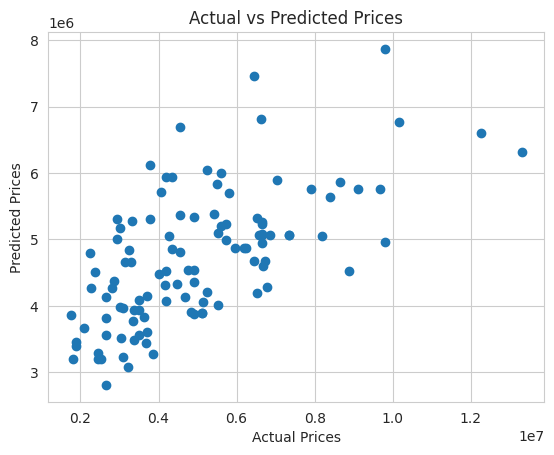

In [41]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

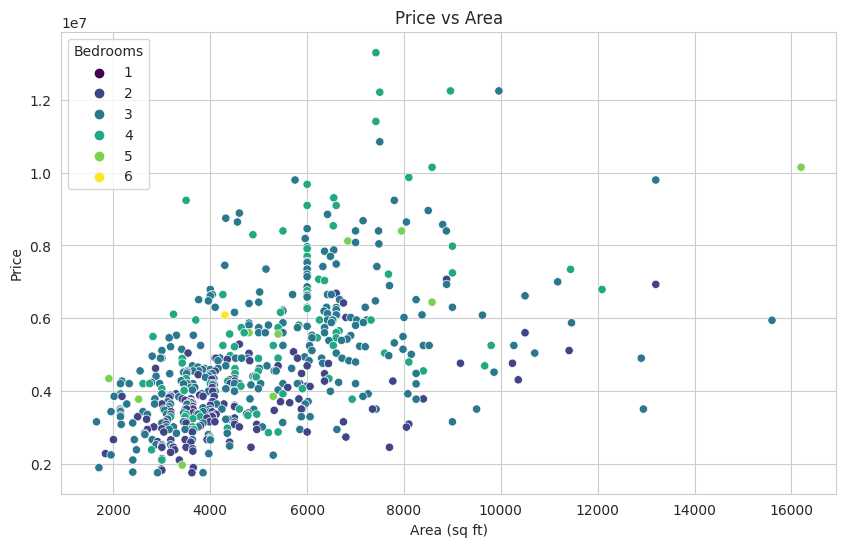

In [43]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SquareFt', y='Price', data=df, hue='Bedrooms', palette='viridis')
plt.title('Price vs Area')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.legend(title='Bedrooms')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


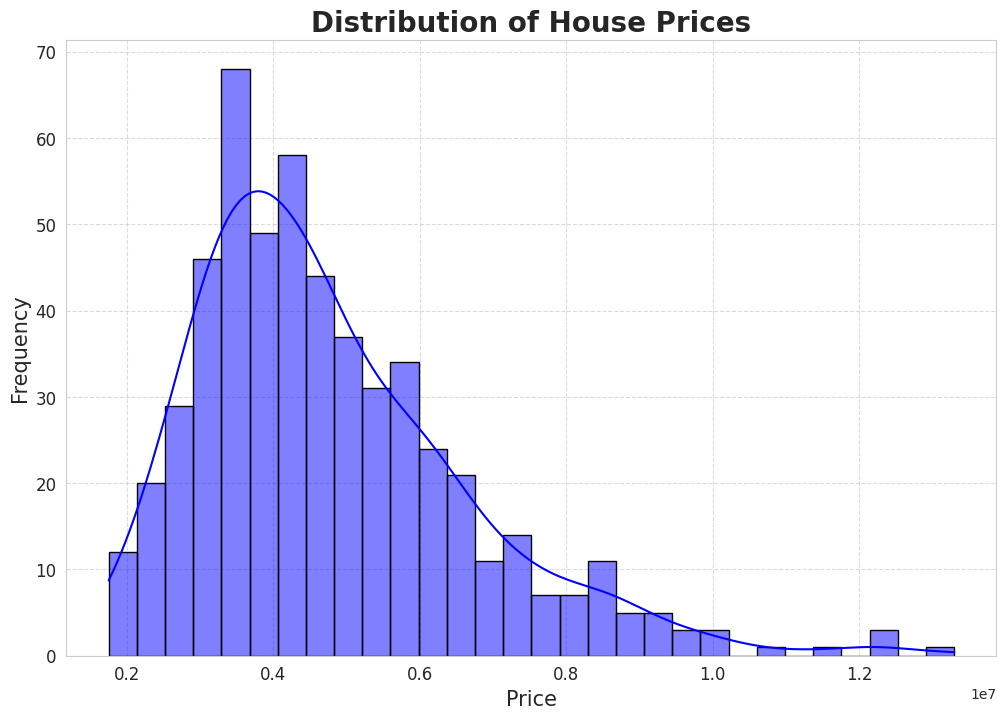

In [44]:
plt.figure(figsize=(12, 8))
sns.histplot(df['Price'], bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of House Prices', fontsize=20, weight='bold')
plt.xlabel('Price', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'SquareFt'}>,
        <Axes: title={'center': 'Bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'mainroad'}>,
        <Axes: title={'center': 'guestroom'}>,
        <Axes: title={'center': 'basement'}>],
       [<Axes: title={'center': 'hotwaterheating'}>,
        <Axes: title={'center': 'airconditioning'}>,
        <Axes: title={'center': 'parking'}>,
        <Axes: title={'center': 'prefarea'}>],
       [<Axes: title={'center': 'furnishingstatus'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

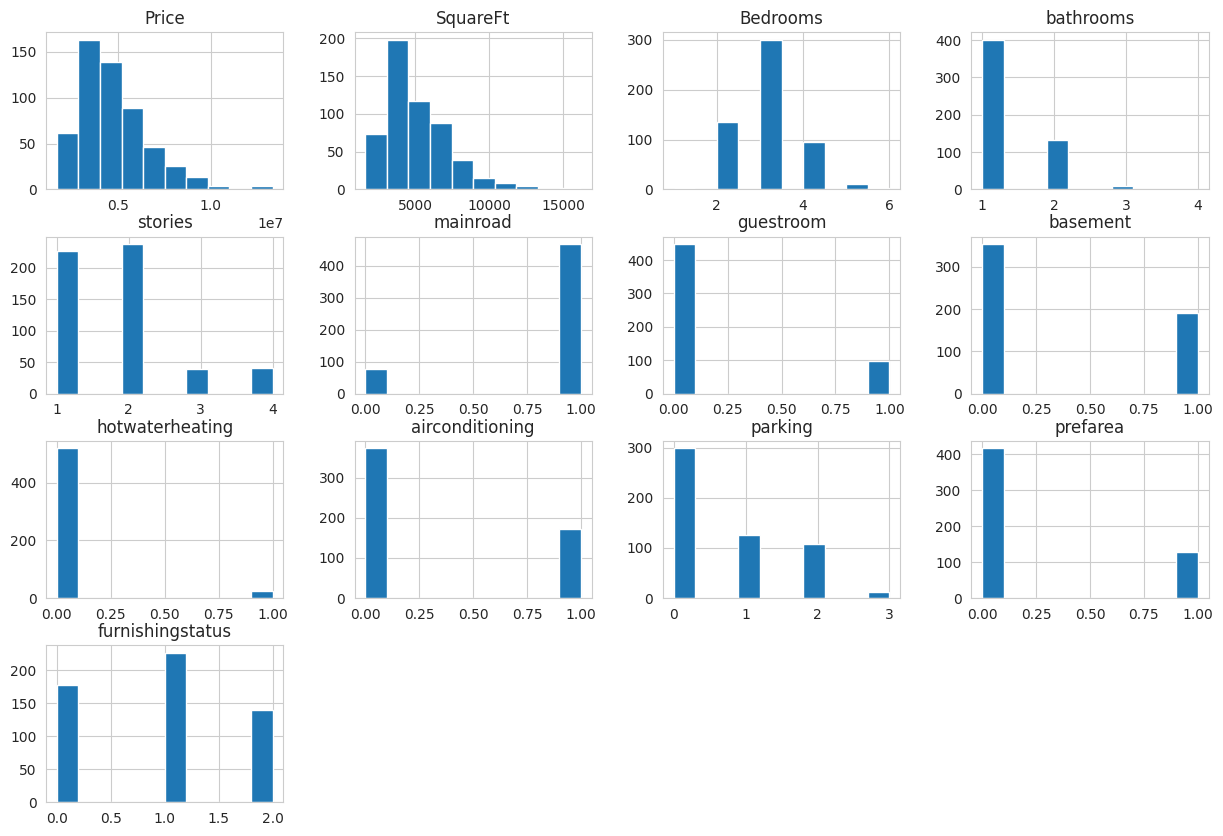

In [45]:
label_encoder = LabelEncoder()
ordinal_encoder = OrdinalEncoder(categories=[['unfurnished','semi-furnished','furnished']])
df['mainroad'] = label_encoder.fit_transform(df['mainroad'])
df['guestroom'] = label_encoder.fit_transform(df['guestroom'])
df['basement'] = label_encoder.fit_transform(df['basement'])
df['hotwaterheating'] = label_encoder.fit_transform(df['hotwaterheating'])
df['airconditioning'] = label_encoder.fit_transform(df['airconditioning'])
df['prefarea'] = label_encoder.fit_transform(df['prefarea'])
df['furnishingstatus'] = ordinal_encoder.fit_transform(df[['furnishingstatus']])
df.hist(figsize=(15,10))